# Modeling Process

**Cross-industry standard process for data mining**, known as **CRISP-DM**, is an open standard process model that describes common approaches used by data mining experts. It is the most widely-used analytics model.

6 high level phases of the data mining process:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

The sequence of the phases is not strict and moving back and forth between different phases as it is always required.


<img src='https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png' width ="400">

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 110)


In [2]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()


(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Now let’s quickly see the names and types of the columns. Most of the time you’re going get data that is not quite what you expected, such as dates which are actually strings and other oddities. But to check upfront.

In [3]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


## Business Understanding
For our business problem, we only want to look at movies that were released in US theaters. So, let's subset our data to only include relevant movies. We  We don't have a data column that tells us this exactly, so we will try our best to aproximate this.  

First, let's limit our dataset to only movies created in the US.

In [4]:
df['country'].value_counts()

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Japan                     23
Italy                     23
Hong Kong                 17
Mexico                    17
New Zealand               15
South Korea               14
Ireland                   12
Denmark                   11
Russia                    11
Norway                     8
South Africa               8
Brazil                     8
Sweden                     6
Netherlands                5
Poland                     5
Thailand                   5
Iran                       4
Argentina                  4
Israel                     4
Romania                    4
Belgium                    4
West Germany               3
Iceland                    3
Switzerland                3
Czech Republic             3
Greece        

In [5]:
#your code here

df= df[df['country']=='USA']

In [6]:
df.shape

(3807, 28)

Now let's only use movies that have been given a MPAA movie rating. This should help remove all 'made for TV' movies. 

In [7]:
df['content_rating'].value_counts()

R            1571
PG-13        1208
PG            558
G              85
Not Rated      51
Approved       46
Unrated        38
TV-14          25
TV-PG          13
X              12
TV-MA          12
Passed          9
TV-G            8
NC-17           5
GP              4
M               3
TV-Y7           1
Name: content_rating, dtype: int64

In [8]:
df = df[df['content_rating'].isin(['R', 'PG-13', 'PG', 'G'])]

In [9]:
df.shape

(3422, 28)

Also, we want to remove independent movies that were only released in a few theaters. Again, we don't have data on this, so we will rmeove movies that made less than $1 million dollars. 

In [10]:
df = df[df['gross']>1000000]

Finally, we can't predict the gross of the movie if we are missing that data. So we will drop all observatiosn missing that data. 

In [11]:
df.shape

(2876, 28)

In [12]:
df.dropna(subset=['gross'], inplace=True)

In [13]:
df.shape

(2876, 28)

## Data Understanding

Now that we have an appropriate subset of movies, let's start to investigate our data and see what changes we need to make.  

In [14]:
# Get column data types
df.dtypes


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [15]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


- We can drop many columns becasue they are not useful to our analysis. Some we know aren't useful becasue we can't process that data yet (genres, plot_keywords). 

In [16]:
df.drop(columns=['director_name','actor_2_name', 'genres', 'actor_1_name', 'actor_3_name','plot_keywords', 'genres','plot_keywords', 'movie_imdb_link'], inplace=True)

- Some data isn't useful becasue it was collected after the movie was released and wouldn't be avaiable for us to make predictions before the movie is released. 

In [17]:
df.drop(columns=['num_critic_for_reviews', 'num_voted_users','movie_facebook_likes', 'num_user_for_reviews', 'imdb_score'], inplace=True)

In [18]:
df.shape

(2876, 16)

- Some columns might not have a lot of variation in the data, and will not be helpful to the model. We need to investigate these further.

In [19]:
df['color'].value_counts()

Color               2806
 Black and White      69
Name: color, dtype: int64

In [20]:
df['aspect_ratio'].value_counts()

2.35    1482
1.85    1259
1.37      28
1.78      24
1.66      20
1.33      14
2.39       8
2.20       3
2.40       3
2.76       2
2.00       2
2.24       1
1.18       1
2.55       1
1.77       1
1.75       1
1.50       1
Name: aspect_ratio, dtype: int64

In [21]:
df['language'].value_counts()

English     2865
Spanish        5
Filipino       1
None           1
Japanese       1
Maya           1
Dari           1
Name: language, dtype: int64

Now let's check to make sure our data is in the right format.

In [22]:
df.dtypes

color                         object
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
movie_title                   object
cast_total_facebook_likes      int64
facenumber_in_poster         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
aspect_ratio                 float64
dtype: object

And change it if it is not. 

In [23]:
df['title_year'][0]

2009.0

In [24]:
df['title_year']= pd.to_datetime(df['title_year'], format='%Y')

In [25]:
df['title_year']

0      2009-01-01
1      2007-01-01
3      2012-01-01
5      2012-01-01
6      2007-01-01
          ...    
4984   1995-01-01
5008   1994-01-01
5012   2014-01-01
5015   1991-01-01
5035   1992-01-01
Name: title_year, Length: 2876, dtype: datetime64[ns]

In [26]:
df['years_old'] = 2016- pd.DatetimeIndex(df['title_year']).year


In [27]:
df['years_old'] 

0        7
1        9
3        4
5        4
6        9
        ..
4984    21
5008    22
5012     2
5015    25
5035    24
Name: years_old, Length: 2876, dtype: int64

## Handling Missing Data:
    


In [28]:
# Find the Percentage of rows missing data
df.isna().mean()

color                        0.000348
duration                     0.000348
director_facebook_likes      0.000000
actor_3_facebook_likes       0.001043
actor_1_facebook_likes       0.000000
gross                        0.000000
movie_title                  0.000000
cast_total_facebook_likes    0.000000
facenumber_in_poster         0.002086
language                     0.000348
country                      0.000000
content_rating               0.000000
budget                       0.035466
title_year                   0.000000
actor_2_facebook_likes       0.000348
aspect_ratio                 0.008693
years_old                    0.000000
dtype: float64

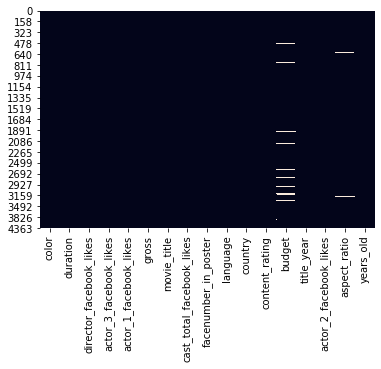

In [29]:
#graphically see the missing data
sns.heatmap(df.isna(), cbar=False)

In [30]:
#look at all the observations with at least one missing data point
df[df['budget'].isna()].head(10)

,color,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,cast_total_facebook_likes,facenumber_in_poster,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,years_old
55,Color,93.0,113.0,113.0,275.0,123070338.0,The Good Dinosaur,696,0.0,English,USA,PG,NaN,2015-01-01,150.0,2.35,1
444,Color,97.0,56.0,852.0,12000.0,82506325.0,Charlotte's Web,23907,0.0,English,USA,G,NaN,2006-01-01,8000.0,1.85,10
490,Color,117.0,93.0,904.0,12000.0,27779888.0,The Edge,14831,2.0,English,USA,R,NaN,1997-01-01,1000.0,2.35,19
640,Color,117.0,44.0,531.0,788.0,27550735.0,The Finest Hours,3524,0.0,English,USA,PG-13,NaN,2016-01-01,562.0,2.35,0
642,Color,114.0,116.0,982.0,7000.0,72980108.0,Dinner for Schmucks,10419,2.0,English,USA,PG-13,NaN,2010-01-01,1000.0,1.85,6
713,Color,100.0,12.0,311.0,419.0,168213584.0,Wild Hogs,1412,3.0,English,USA,PG-13,NaN,2007-01-01,330.0,2.35,9
773,Color,127.0,162.0,379.0,18000.0,36965395.0,State of Play,19776,3.0,English,USA,PG-13,NaN,2009-01-01,748.0,2.35,7
780,Color,111.0,39.0,461.0,16000.0,35754555.0,Trouble with the Curve,17871,0.0,English,USA,PG-13,NaN,2012-01-01,897.0,2.35,4
925,Color,93.0,14.0,728.0,2000.0,35092918.0,Deck the Halls,5468,0.0,English,USA,PG,NaN,2006-01-01,1000.0,1.85,10
949,Color,124.0,488.0,1000.0,19000.0,75621915.0,We Bought a Zoo,36873,3.0,English,USA,PG,NaN,2011-01-01,13000.0,1.85,5


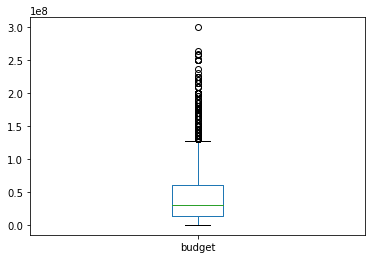

In [31]:
df['budget'].plot(kind='box')

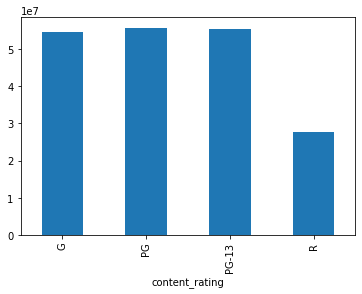

In [32]:
df.groupby('content_rating')['budget'].mean().plot(kind='bar')

In [33]:
budget_ratings = df.groupby('content_rating')['budget'].mean().round(1).to_dict()

budget_ratings

{'G': 54629811.6, 'PG': 55784317.0, 'PG-13': 55495062.6, 'R': 27623637.4}

In [34]:
df['budget'].fillna(df['content_rating'].map(budget_ratings), inplace=True)


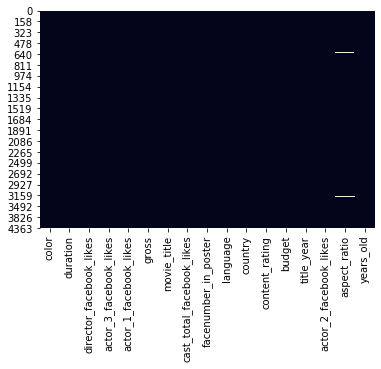

In [35]:
sns.heatmap(df.isnull(), cbar=False)

### Handling Categorical Data



For the column of `rating`, we can see that the values come through as strings that represent a category.  We can not put a string through as a value for a linear model. Instead we use dummy variables.

In [36]:
df = pd.get_dummies(df, columns=['content_rating'], drop_first=True)

In [37]:
df = pd.get_dummies(df, columns=['color'], drop_first=True)

In [38]:
df.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,cast_total_facebook_likes,facenumber_in_poster,language,country,budget,title_year,actor_2_facebook_likes,aspect_ratio,years_old,content_rating_PG,content_rating_PG-13,content_rating_R,color_Color
0,178.0,0.0,855.0,1000.0,760505847.0,Avatar,4834,0.0,English,USA,237000000.0,2009-01-01,936.0,1.78,7,0,1,0,1
1,169.0,563.0,1000.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,48350,0.0,English,USA,300000000.0,2007-01-01,5000.0,2.35,9,0,1,0,1
3,164.0,22000.0,23000.0,27000.0,448130642.0,The Dark Knight Rises,106759,0.0,English,USA,250000000.0,2012-01-01,23000.0,2.35,4,0,1,0,1
5,132.0,475.0,530.0,640.0,73058679.0,John Carter,1873,1.0,English,USA,263700000.0,2012-01-01,632.0,2.35,4,0,1,0,1
6,156.0,0.0,4000.0,24000.0,336530303.0,Spider-Man 3,46055,0.0,English,USA,258000000.0,2007-01-01,11000.0,2.35,9,0,1,0,1


### Visualize the data

In [39]:
cols = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 
       'cast_total_facebook_likes', 'facenumber_in_poster', 
       'budget',  'actor_2_facebook_likes',
        'color_Color', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R', 'years_old','gross']

In [40]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

In [41]:
row_groups

[['duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes'],
 ['cast_total_facebook_likes',
  'facenumber_in_poster',
  'budget',
  'actor_2_facebook_likes'],
 ['color_Color',
  'content_rating_PG',
  'content_rating_PG-13',
  'content_rating_R'],
 ['years_old', 'gross']]

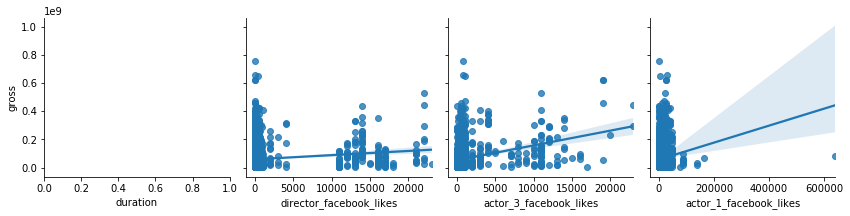

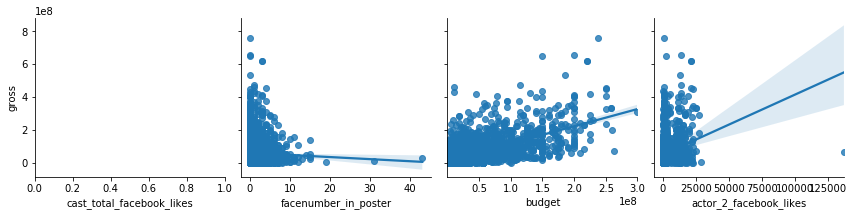

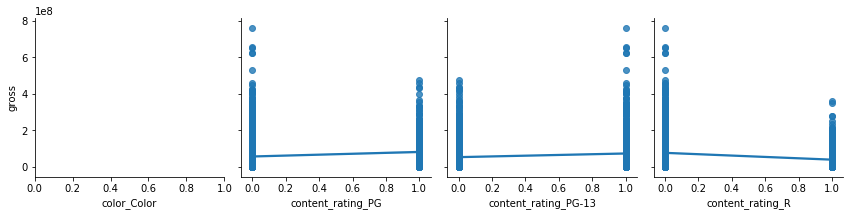

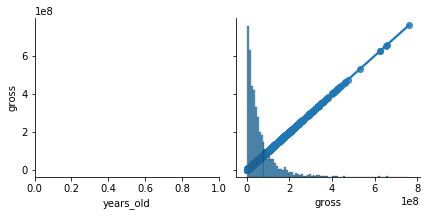

In [43]:
for i in row_groups:
    pp = sns.pairplot(data=df[cols], y_vars='gross',x_vars=i, kind="reg", height=3)

### Removing Outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [44]:
df['actor_1_facebook_likes'].describe()

count      2876.000000
mean       8341.289638
std       16376.342359
min           0.000000
25%         839.000000
50%        2000.000000
75%       13000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [45]:
df['actor_1_facebook_likes']= np.where(df['actor_1_facebook_likes'] >200000, 200000, df['actor_1_facebook_likes'])

In [46]:
df['actor_2_facebook_likes'].describe()

count      2875.000000
mean       2248.730087
std        4890.340005
min           0.000000
25%         459.000000
50%         754.000000
75%        1000.000000
max      137000.000000
Name: actor_2_facebook_likes, dtype: float64

In [47]:
df['actor_2_facebook_likes']= np.where(df['actor_2_facebook_likes'] >30000, 30000, df['actor_1_facebook_likes'])

## Feature Engineering

### Creating New columns based on other columns

In [48]:
# Create a new column called df.superstar where the value is 1
# if df.actor_1_facebook_likes is greater th000 and 0 if not
df['superstar'] = np.where(df['actor_1_facebook_likes']>=15000, 1, 0)

df[['movie_title', 'actor_1_facebook_likes', 'superstar']].head(10)

,movie_title,actor_1_facebook_likes,superstar
0,Avatar,1000.0,0
1,Pirates of the Caribbean: At World's End,40000.0,1
3,The Dark Knight Rises,27000.0,1
5,John Carter,640.0,0
6,Spider-Man 3,24000.0,1
7,Tangled,799.0,0
8,Avengers: Age of Ultron,26000.0,1
10,Batman v Superman: Dawn of Justice,15000.0,1
11,Superman Returns,18000.0,1
13,Pirates of the Caribbean: Dead Man's Chest,40000.0,1


In [49]:
features =  ['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 
       'cast_total_facebook_likes', 'facenumber_in_poster', 
       'budget',  'actor_2_facebook_likes',
        'color_Color', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R', 'years_old']

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [51]:
poly_data = poly.fit_transform(df[features])


poly_columns = poly.get_feature_names(features)

df_poly = pd.DataFrame(poly_data, columns=poly_columns)

df_poly.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
# Find the Percentage of rows missing data
df[features].isna().mean()

duration                     0.000000
director_facebook_likes      0.000000
actor_3_facebook_likes       0.000000
actor_1_facebook_likes       0.000000
cast_total_facebook_likes    0.000000
facenumber_in_poster         0.002086
budget                       0.000000
actor_2_facebook_likes       0.000000
color_Color                  0.000000
content_rating_PG            0.000000
content_rating_PG-13         0.000000
content_rating_R             0.000000
years_old                    0.000000
dtype: float64

In [55]:
df['duration'].fillna(df['duration'].mean(), inplace=True)


In [56]:
df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].mean(), inplace=True)


In [57]:
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mean(), inplace=True)


In [58]:
poly_data = poly.fit_transform(df[features])


poly_columns = poly.get_feature_names(features)

df_poly = pd.DataFrame(poly_data, columns=poly_columns)

df_poly.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,color_Color,content_rating_PG,content_rating_PG-13,content_rating_R,years_old,duration^2,duration director_facebook_likes,duration actor_3_facebook_likes,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration facenumber_in_poster,duration budget,duration actor_2_facebook_likes,duration color_Color,duration content_rating_PG,duration content_rating_PG-13,duration content_rating_R,duration years_old,director_facebook_likes^2,director_facebook_likes actor_3_facebook_likes,director_facebook_likes actor_1_facebook_likes,director_facebook_likes cast_total_facebook_likes,director_facebook_likes facenumber_in_poster,director_facebook_likes budget,director_facebook_likes actor_2_facebook_likes,director_facebook_likes color_Color,director_facebook_likes content_rating_PG,director_facebook_likes content_rating_PG-13,director_facebook_likes content_rating_R,director_facebook_likes years_old,actor_3_facebook_likes^2,actor_3_facebook_likes actor_1_facebook_likes,actor_3_facebook_likes cast_total_facebook_likes,actor_3_facebook_likes facenumber_in_poster,actor_3_facebook_likes budget,actor_3_facebook_likes actor_2_facebook_likes,actor_3_facebook_likes color_Color,actor_3_facebook_likes content_rating_PG,actor_3_facebook_likes content_rating_PG-13,actor_3_facebook_likes content_rating_R,actor_3_facebook_likes years_old,actor_1_facebook_likes^2,...,actor_1_facebook_likes color_Color,actor_1_facebook_likes content_rating_PG,actor_1_facebook_likes content_rating_PG-13,actor_1_facebook_likes content_rating_R,actor_1_facebook_likes years_old,cast_total_facebook_likes^2,cast_total_facebook_likes facenumber_in_poster,cast_total_facebook_likes budget,cast_total_facebook_likes actor_2_facebook_likes,cast_total_facebook_likes color_Color,cast_total_facebook_likes content_rating_PG,cast_total_facebook_likes content_rating_PG-13,cast_total_facebook_likes content_rating_R,cast_total_facebook_likes years_old,facenumber_in_poster^2,facenumber_in_poster budget,facenumber_in_poster actor_2_facebook_likes,facenumber_in_poster color_Color,facenumber_in_poster content_rating_PG,facenumber_in_poster content_rating_PG-13,facenumber_in_poster content_rating_R,facenumber_in_poster years_old,budget^2,budget actor_2_facebook_likes,budget color_Color,budget content_rating_PG,budget content_rating_PG-13,budget content_rating_R,budget years_old,actor_2_facebook_likes^2,actor_2_facebook_likes color_Color,actor_2_facebook_likes content_rating_PG,actor_2_facebook_likes content_rating_PG-13,actor_2_facebook_likes content_rating_R,actor_2_facebook_likes years_old,color_Color^2,color_Color content_rating_PG,color_Color content_rating_PG-13,color_Color content_rating_R,color_Color years_old,content_rating_PG^2,content_rating_PG content_rating_PG-13,content_rating_PG content_rating_R,content_rating_PG years_old,content_rating_PG-13^2,content_rating_PG-13 content_rating_R,content_rating_PG-13 years_old,content_rating_R^2,content_rating_R years_old,years_old^2
0,178.0,0.0,855.0,1000.0,4834.0,0.0,237000000.0,1000.0,1.0,0.0,1.0,0.0,7.0,31684.0,0.0,152190.0,178000.0,860452.0,0.0,4.218600e+10,178000.0,178.0,0.0,178.0,0.0,1246.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,731025.0,855000.0,4.133070e+06,0.0,2.026350e+11,855000.0,855.0,0.0,855.0,0.0,5985.0,1.000000e+06,...,1000.0,0.0,1000.0,0.0,7000.0,2.336756e+07,0.0,1.145658e+12,4.834000e+06,4834.0,0.0,4834.0,0.0,33838.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.616900e+16,2.370000e+11,237000000.0,0.0,237000000.0,0.0,1.659000e+09,1.000000e+06,1000.0,0.0,1000.0,0.0,7000.0,1.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,49.0
1,169.0,563.0,1000.0,40000.0,48350.0,0.0,300000000.0,40000.0,1.0,0.0,1.0,0.0,9.0,28561.0,95147.0,169000.0,6760000.0,8171150.0,0.0,5.070000e+10,6760000.0,169.0,0.0,169.0,0.0,1521.0,316969.0,563000.0,22520000.0,2.722105e+0

## Modeling 


Now that our data is cleaned up and prepared, we cna start the modeling process. First step is to do a train-test split so that we can evaluate the model after fitting it.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [60]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, df['gross'], random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (2300, 104) Target:  (2300,)
Training set - Features:  (576, 104) Target:  (576,)


I'm going to use a LASSO model later so I want to scale my data. Remember to fit your scaler to the training data and then transform the test data.

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


#fit and transform the training data
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=df_poly.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_poly.columns)

In [62]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 52395762.500160664


(array([  6.,   3.,   9.,  21.,  54., 113., 347., 729., 460., 244., 113.,
         71.,  46.,  24.,  19.,  11.,   7.,   5.,   6.,   5.,   2.,   0.,
          1.,   2.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([-1.82677163e+08, -1.60402563e+08, -1.38127963e+08, -1.15853363e+08,
        -9.35787628e+07, -7.13041628e+07, -4.90295628e+07, -2.67549629e+07,
        -4.48036288e+06,  1.77942371e+07,  4.00688371e+07,  6.23434371e+07,
         8.46180371e+07,  1.06892637e+08,  1.29167237e+08,  1.51441837e+08,
         1.73716437e+08,  1.95991037e+08,  2.18265637e+08,  2.40540237e+08,
         2.62814837e+08,  2.85089437e+08,  3.07364037e+08,  3.29638637e+08,
         3.51913237e+08,  3.74187837e+08,  3.96462437e+08,  4.18737037e+08,
         4.41011637e+08,  4.63286237e+08,  4.85560837e+08]),
 <a list of 30 Patch objects>)

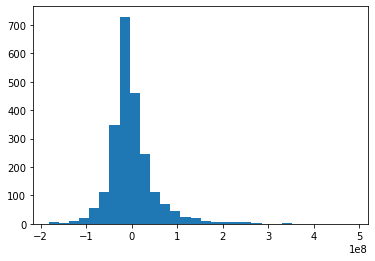

In [63]:
residuals = (y_train- y_train_pred)

plt.hist(residuals, bins=30)

/Users/browz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


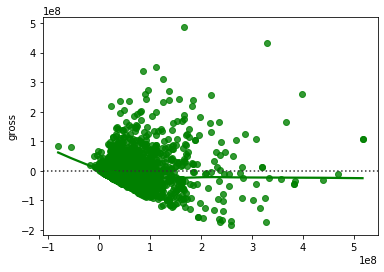

In [64]:
sns.residplot(y_train_pred, y_train, lowess=True, color="g")

### Feature Selection

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
vif["features"] = df[features].columns
vif.round(1)

/Users/browz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/browz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,27.2,duration
1,1.2,director_facebook_likes
2,1.9,actor_3_facebook_likes
3,46.3,actor_1_facebook_likes
4,9.0,cast_total_facebook_likes
5,1.5,facenumber_in_poster
6,2.9,budget
7,35.6,actor_2_facebook_likes
8,24.2,color_Color
9,5.2,content_rating_PG


In [75]:
from sklearn.feature_selection import RFECV

ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=7,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [76]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [77]:
list(removed_rfe)

len(list(selected_rfe))

15

In [78]:
selected_rfe

Index(['director_facebook_likes', 'cast_total_facebook_likes',
       'duration cast_total_facebook_likes', 'duration budget',
       'duration actor_2_facebook_likes',
       'director_facebook_likes content_rating_PG',
       'director_facebook_likes content_rating_PG-13',
       'director_facebook_likes content_rating_R',
       'actor_1_facebook_likes content_rating_PG-13',
       'actor_1_facebook_likes content_rating_R',
       'cast_total_facebook_likes color_Color',
       'cast_total_facebook_likes content_rating_PG',
       'cast_total_facebook_likes content_rating_PG-13',
       'cast_total_facebook_likes content_rating_R',
       'actor_2_facebook_likes content_rating_PG-13'],
      dtype='object')

Now let's use those selected features to fit a model.

In [79]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 55513890.259800956
Testing Root Mean Squared Error: 55188742.18546332


In [93]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

/Users/browz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=20, score_func=<function f_regression at 0x7fd5fb7bc8c8>)

In [94]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [96]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100, normalize=False)

lasso.fit(X_train[selected_columns],y_train)

y_train_pred_lasso = lasso.predict(X_train[selected_columns])
y_pred_lasso = lasso.predict(X_test[selected_columns])

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )



Training Error: 36242741.54784677
Testing Error: 63749199.056364514


/Users/browz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.344014513759189e+18, tolerance: 1287379274378923.2
  positive)
